# Using KBinsDiscretizer to discretize continuous features


The example compares prediction result of linear regression (linear model) and decision tree (tree based model) with and without discretization of real-valued features.

------------------------

该示例比较了 具有和不具有 实值特征的离散化 的线性回归（线性模型）和决策树（基于树的模型）的预测结果。

As is shown in the result before discretization, linear model is fast to build and relatively straightforward to interpret, but can only model linear relationships, while decision tree can build a much more complex model of the data. 

One way to make linear model more powerful on continuous data is to use discretization (also known as binning). 

In the example, we discretize the feature and one-hot encode the transformed data. Note that if the bins are not reasonably wide, there would appear to be a substantially increased risk of overfitting, so the discretizer parameters should usually be tuned under cross validation.

---------------------

如离散化前的结果所示，线性模型构建起来快，解释相对简单，但只能建模线性关系，而决策树可以构建更复杂的数据模型。

使连续数据的线性模型更强大的一种方法是使用离散化（也称为binning）。

在该示例中，我们对特征进行离散化并对转换后的数据进行one-hot编码。请注意，如果bin宽度不合适，则过度拟合的风险会显着增加，因此离散器参数通常应在交叉验证下进行调整。

After discretization, linear regression and decision tree make exactly the same prediction. 

As features are constant within each bin, any model must predict the same value for all points within a bin. Compared with the result before discretization, linear model become much more flexible while decision tree gets much less flexible. 

Note that binning features generally has no beneficial effect for tree-based models, as these models can learn to split up the data anywhere. 

-------------------

离散化后，线性回归和决策树使预测完全相同。

由于特征在每个区域内是恒定的，因此任何模型都必须为区域内的所有点预测相同的值。与离散化前的结果相比，线性模型变得更加灵活，而决策树变得不那么灵活。

请注意，bining 特征通常对基于树的模型没有任何有益效果，因为这些模型可以学习在任何地方分割数据。

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
print(__doc__)

Automatically created module for IPython interactive environment


In [5]:
rnd = np.random.RandomState(42)

In [8]:
X = rnd.uniform(-3,3,size=100)
y = np.sin(X) + rnd.normal(size=len(X))/3
X = X.reshape(-1,1)

In [10]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


In [17]:
# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10,encode='onehot')
X_binned = enc.fit_transform(X)

In [21]:
X_binned.toarray()[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

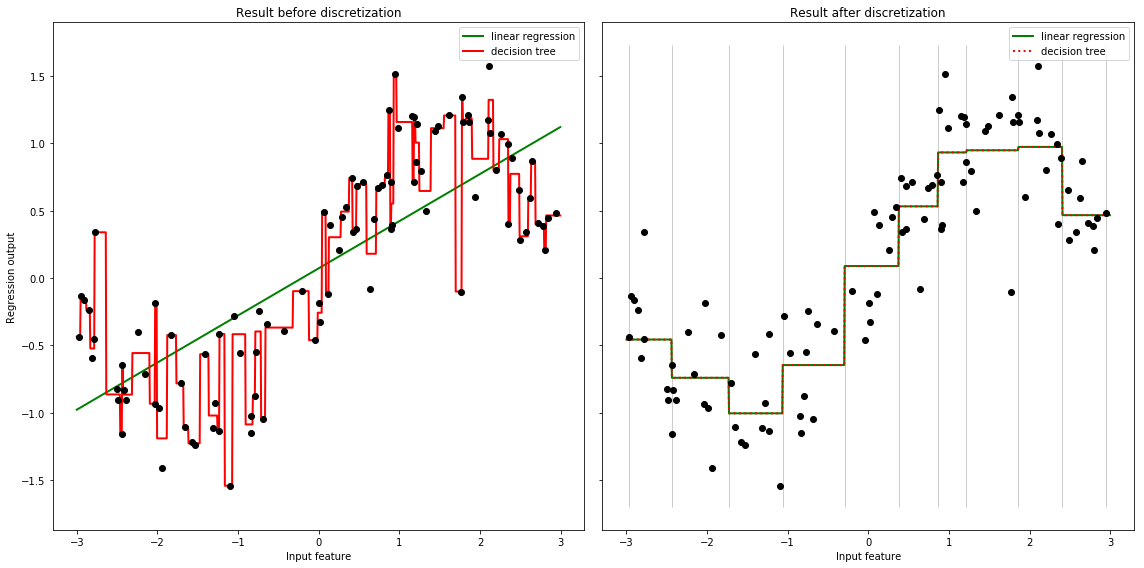

In [25]:
# predict with original dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(16, 8))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color='green',
         label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color='red',
         label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# predict with transformed dataset
line_binned = enc.transform(line)
reg = LinearRegression().fit(X_binned, y)
ax2.plot(line, reg.predict(line_binned), linewidth=2, color='green',
         linestyle='-', label='linear regression')
reg = DecisionTreeRegressor(min_samples_split=3,
                            random_state=0).fit(X_binned, y)
ax2.plot(line, reg.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()
plt.show()

In [26]:
line_binned.shape

(1000, 10)

In [27]:
line_binned.toarray()[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])